# Data Analysis of Popular Songs

## 1. Introduction

This project analyzes a dataset from Kaggle of the most popular songs on Spotify to gain a better understanding of trends in modern music. The dataset includes data about songs (release date, artist count, number of streams) along with popularity in charts/playlists from Spotify, Apple Music, Deezer, and Shazam.

Understanding trends in popular music is relevant because the streaming data reflects real life patterns. From a data science perspective, this dataset provides an example of how data can be analyzed to make insights into listener behavior.

Through data analysis, I will explore the following questions:

- What makes a song popular?
- How do specific features of a song (energy, valence, danceability, speechiness) correlate with number of streams?
- Which artists dominate the charts overall?
- Which release months and years are most common among the most popular music?
- How do different platforms vary for artists?

In [35]:
%pip install pandas
%pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Popular_Spotify_Songs.csv", encoding="latin1")

## 2. Data Cleaning
To clean the data, I removed any null values. I then converted any attribute columns that were objects to integers and floats for better comparison. This included streams, presence in Deezer playlists and Shazam charts, key, and mode of the song.

In [36]:
df.isnull().sum()

numeric_cols = ["streams", "in_deezer_playlists", "in_shazam_charts"]
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(",", "",)
    df[col] = pd.to_numeric(df[col], errors="coerce")

keys_data = {'C':0, 'C#':1, 'Db':1, 'D':2, 'D#':3, 'Eb':3, 'E':4, 'F':5, 'F#':6, 'Gb':6, 'G':7, 'G#':8, 'Ab':8, 'A':9, 'A#':10, 'Bb':10, 'B':11}
df["key"] = df["key"].map(keys_data)

mode_data = {"Major": 1, "Minor": 0}
df["mode"] = df["mode"].map(mode_data)

## 3. Exploratory Data Analysis
I explored the structure and characteristics of the Popular Spotify Songs dataset to understand the patterns within the data. Exploratory Data Analysis reveals trends in listener behavior, relationships between attributes of various songs, and how factors such as release year, playlists, and musical features can influence the popularity of a song. I visualized a few key variables from the dataset, and examined distributions, correlations, and outliers. By using plots and data visualizations, I can identify the most relevant music features to answer the research questions I posed earlier.

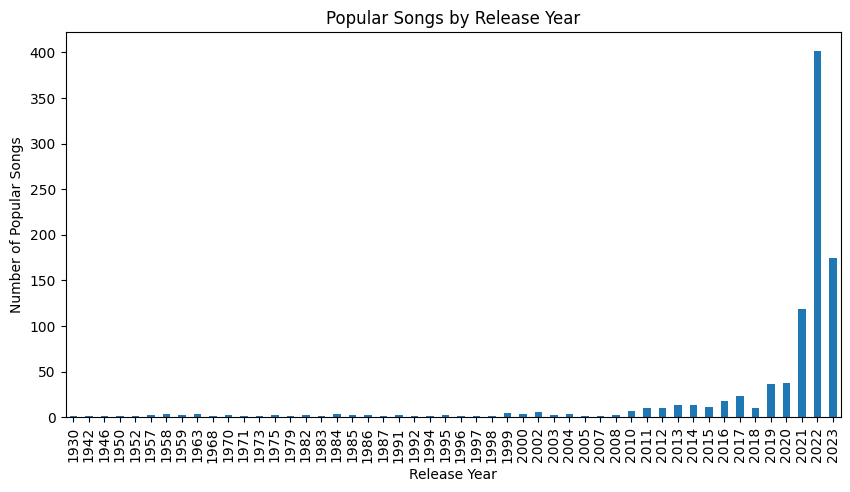

In [37]:
### 3.1 Release Year Distribution

plt.figure(figsize=(10,5))
df['released_year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Release Year")
plt.ylabel("Number of Popular Songs")
plt.title("Popular Songs by Release Year")
plt.show()


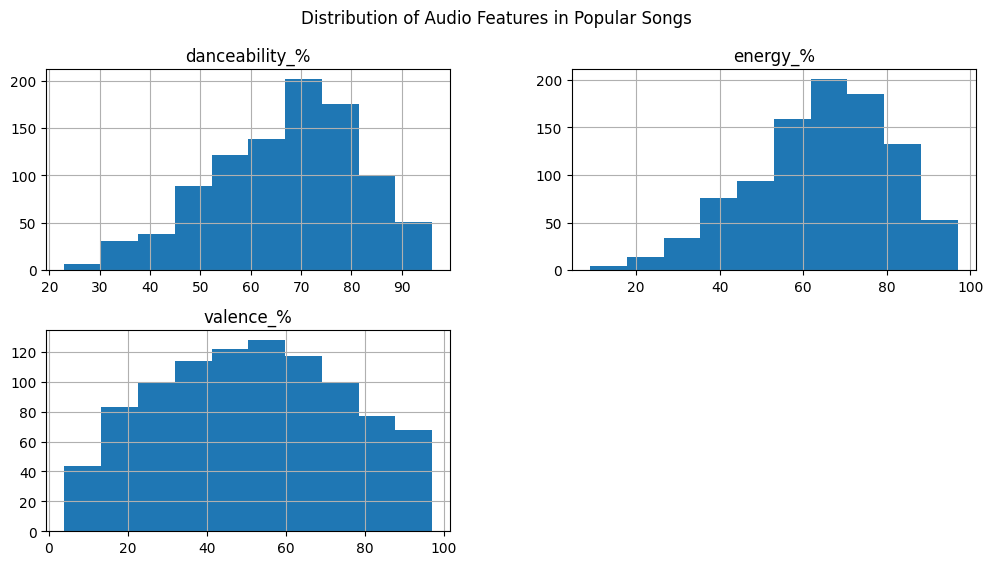

In [38]:
### 3.2 Audio Feature Distributions

features = ['danceability_%','energy_%','valence_%']

df[features].hist(figsize=(12,6))
plt.suptitle("Distribution of Audio Features in Popular Songs")
plt.show()

In [39]:
### 3.3 Correlation with Streams

df_corr = df[['streams','danceability_%','valence_%','energy_%']].corr()
df_corr

,streams,danceability_%,valence_%,energy_%
streams,1.000000,-0.105457,-0.040831,-0.026051
danceability_%,-0.105457,1.000000,0.408451,0.198095
valence_%,-0.040831,0.408451,1.000000,0.357612
energy_%,-0.026051,0.198095,0.357612,1.000000


## 4. Research Questions
1. Which artists have the most popular songs in the dataset?
2. Which release year produced the most top songs?
3. What audio features correlate most with higher streams?
4. Do songs with multiple artists or one single artist have more streams?
5. What BPM ranges appear most often among hit tracks?
6. Which months have the highest number of popular releases?
7. Do songs with higher energy appear more on Spotify charts?

In [40]:
#1
df['artist(s)_name'].value_counts().head(10)

,count
artist(s)_name,
Taylor Swift,34
The Weeknd,22
SZA,19
Bad Bunny,19
Harry Styles,17
Kendrick Lamar,12
Morgan Wallen,11
Ed Sheeran,9
BTS,8


In [41]:
#2
df.groupby('released_year')['streams'].mean().sort_values(ascending=False).head()

,streams
released_year,
1975,2.103053e+09
1983,1.593271e+09
2003,1.584021e+09
1987,1.553498e+09
2018,1.503052e+09


In [42]:
#3
df[['streams','danceability_%','valence_%','energy_%']].corr()['streams']

,streams
streams,1.000000
danceability_%,-0.105457
valence_%,-0.040831
energy_%,-0.026051


In [43]:
#4
df.groupby('artist_count')['streams'].mean()

,streams
artist_count,
1,5.682117e+08
2,4.624808e+08
3,3.813421e+08
4,3.061062e+08
5,1.448082e+08
6,8.746645e+07
7,3.390601e+08
8,1.732212e+08


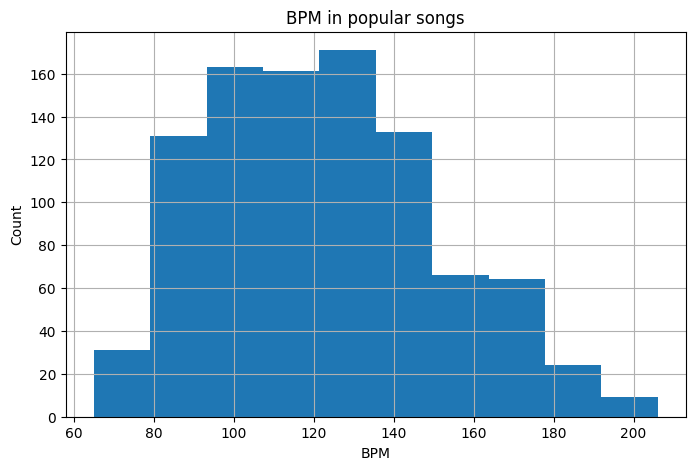

In [44]:
#5
plt.figure(figsize=(8,5))
df['bpm'].hist()
plt.title("BPM in popular songs")
plt.xlabel("BPM")
plt.ylabel("Count")
plt.show()

In [45]:
#6
df['released_month'].value_counts().sort_index()

,count
released_month,
1,134
2,61
3,86
4,66
5,128
6,86
7,62
8,46
9,56


In [46]:
#7
df[['energy_%','in_spotify_charts']].corr()

,energy_%,in_spotify_charts
energy_%,1.00000,0.08192
in_spotify_charts,0.08192,1.00000


## 5. Insights & Narrative

Insight 1: Collaboration Works

Songs with 2 or more artists have higher average stream counts than solo songs. This suggests that collaboration across multiple artists' fanbases increases the popularity of a song.

Insight 2: Recent Songs' Popularity

The highest average streams come from songs with more recent release years.

Insight 3: Attributes of Popular Music

Popular songs typically have high danceability, high energy, moderately high valence. From our data analysis, we can see that these attributes tend to increase the popularity of a song. This fits the mainstream pop trends, as most pop songs are pretty upbeat and energetic.

Insight 4: Popular BPM Ranges

Most popular BPMs cluster around 90–110 BPM and 120–130 BPM.

Insight 5: Release Dates

Peak months for popular releases appear around June–August, as upbeat music tends to do well during the summer.

## Summary
Modern popular music on streaming platforms favors collaborative tracks, high energy, danceability, releases in more recent years, recognizable keys, tempo ranges optimal for dancing to. These insights could help artists aiming to optimize their releases for streaming success.

## 6. Conclusion
Using this dataset, we identified patterns in artist collaboration, release timing, and various features of songs that correlate with high streaming performance. While correlation does not imply causation, the trends point toward a recognizable formula in modern pop music for streaming success.